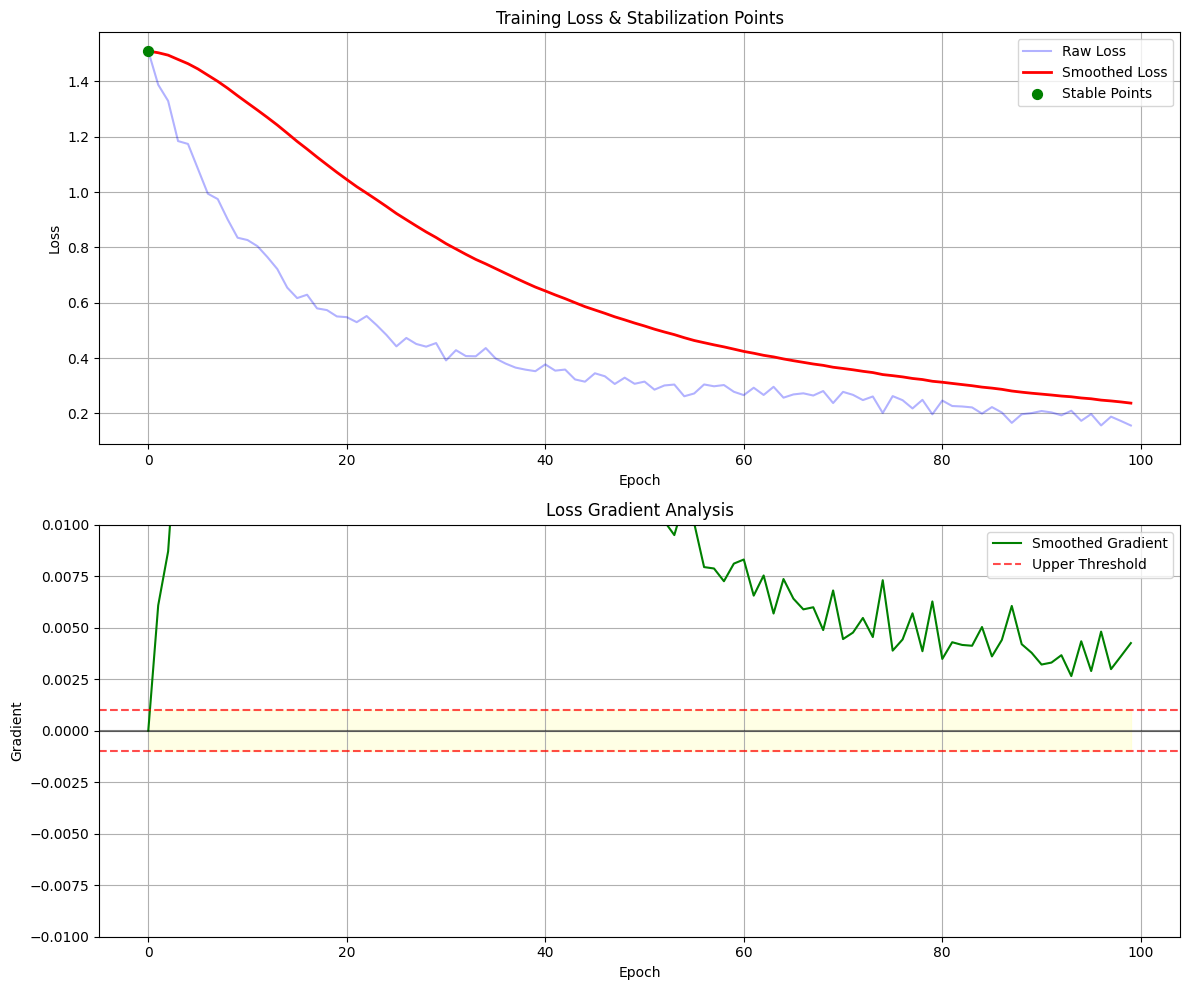

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_loss_gradient(loss_history, alpha=0.9, grad_threshold=1e-5):
    """
    计算平滑损失梯度并检测稳定点
    
    参数:
    loss_history: 每个epoch的损失值列表
    alpha: 指数加权平均的平滑系数 (0 < alpha < 1)
    grad_threshold: 梯度稳定阈值
    
    返回:
    smooth_loss: 平滑后的损失曲线
    gradients: 每个epoch的梯度值
    stable_epochs: 达到稳定的epoch索引列表
    """
    # 指数加权平均平滑
    smooth_loss = [loss_history[0]]
    for loss in loss_history[1:]:
        smooth_loss.append(alpha * smooth_loss[-1] + (1 - alpha) * loss)
    
    # 计算梯度 (一阶差分)
    gradients = [0]  # 第一个epoch梯度设为0
    for i in range(1, len(smooth_loss)):
        gradients.append(smooth_loss[i-1] - smooth_loss[i])  # 负梯度表示下降
    
    # 检测稳定点 (梯度绝对值小于阈值)
    stable_epochs = [
        epoch for epoch, grad in enumerate(gradients) 
        if abs(grad) < grad_threshold
    ]
    
    return smooth_loss, gradients, stable_epochs

# 示例使用
if __name__ == "__main__":
    # 生成模拟损失曲线 (加入随机噪声)
    epochs = 100
    true_loss = [np.exp(-0.1*e) + 0.5*np.exp(-0.01*e) for e in range(epochs)]
    loss_history = [loss + np.random.normal(0, 0.02) for loss in true_loss]
    
    # 计算平滑梯度
    smooth_loss, gradients, stable_epochs = smooth_loss_gradient(
        loss_history, alpha=0.95, grad_threshold=0.001
    )
    
    # 可视化结果
    plt.figure(figsize=(12, 10))
    
    # 损失曲线图
    plt.subplot(2, 1, 1)
    plt.plot(loss_history, 'b-', alpha=0.3, label='Raw Loss')
    plt.plot(smooth_loss, 'r-', linewidth=2, label='Smoothed Loss')
    plt.scatter(stable_epochs, [smooth_loss[e] for e in stable_epochs], 
                c='green', s=50, zorder=5, label='Stable Points')
    plt.title('Training Loss & Stabilization Points')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # 梯度曲线图
    plt.subplot(2, 1, 2)
    plt.plot(gradients, 'g-', label='Smoothed Gradient')
    plt.axhline(y=0.001, color='r', linestyle='--', alpha=0.7, label='Upper Threshold')
    plt.axhline(y=-0.001, color='r', linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
    plt.fill_between(range(epochs), -0.001, 0.001, color='yellow', alpha=0.1)
    plt.title('Loss Gradient Analysis')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient')
    plt.ylim(-0.01, 0.01)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    # plt.savefig('loss_gradient_analysis.png', dpi=300)
    plt.show()